In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [2]:
random.randint(1,train.shape[0])
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

#Define class labels for easy interpretation
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [3]:
len(test_data)

7176

Label for the image is:  T


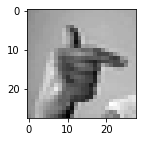

In [4]:
i = random.randint(1,train.shape[0])
# print(i)
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

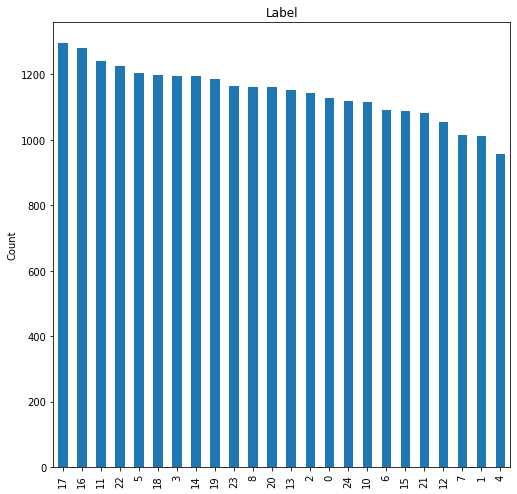

In [5]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [6]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [7]:
#Convert y to categorical if planning on using categorical cross entropy
#No need to do this if using sparse categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

In [9]:
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [10]:
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))


Epoch 1/10
215/215 [==============================] - 12s 54ms/step - loss: 2.5305 - acc: 0.2198 - val_loss: 1.3660 - val_acc: 0.5810
Epoch 2/10
215/215 [==============================] - 11s 50ms/step - loss: 1.0174 - acc: 0.6551 - val_loss: 0.7235 - val_acc: 0.7545
Epoch 3/10
215/215 [==============================] - 11s 50ms/step - loss: 0.5869 - acc: 0.7998 - val_loss: 0.5446 - val_acc: 0.8183
Epoch 4/10
215/215 [==============================] - 11s 50ms/step - loss: 0.3781 - acc: 0.8716 - val_loss: 0.3764 - val_acc: 0.8835
Epoch 5/10
215/215 [==============================] - 11s 50ms/step - loss: 0.2566 - acc: 0.9146 - val_loss: 0.3176 - val_acc: 0.8933
Epoch 6/10
215/215 [==============================] - 11s 50ms/step - loss: 0.1816 - acc: 0.9408 - val_loss: 0.2932 - val_acc: 0.9011
Epoch 7/10
215/215 [==============================] - 11s 50ms/step - loss: 0.1311 - acc: 0.9586 - val_loss: 0.2573 - val_acc: 0.9202
Epoch 8/10
215/215 [==============================] - 11s 51ms

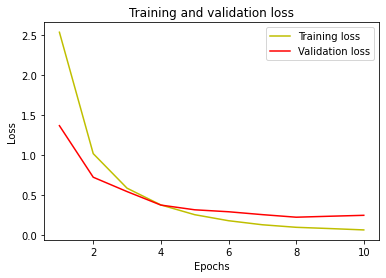

In [11]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

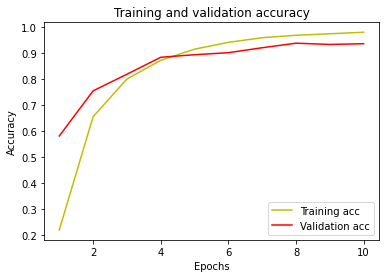

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# prediction = model.predict_classes(X_test)
prediction = model.predict(X_test)
prediction_classes =np.argmax(prediction,axis=1)

225/225 [==============================] - 1s 4ms/step


In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction_classes)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.93561872909699


Image Number -->  2840
Predicted Label:  D
True Label:  D


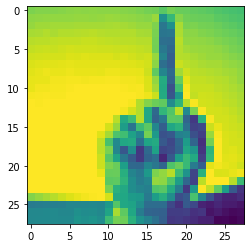

In [17]:
i = np.random.randint(1,X_test.shape[0])
print("Image Number --> ",i)

plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction_classes[i])])
print("True Label: ", class_names[int(y_test[i])])

<AxesSubplot:>

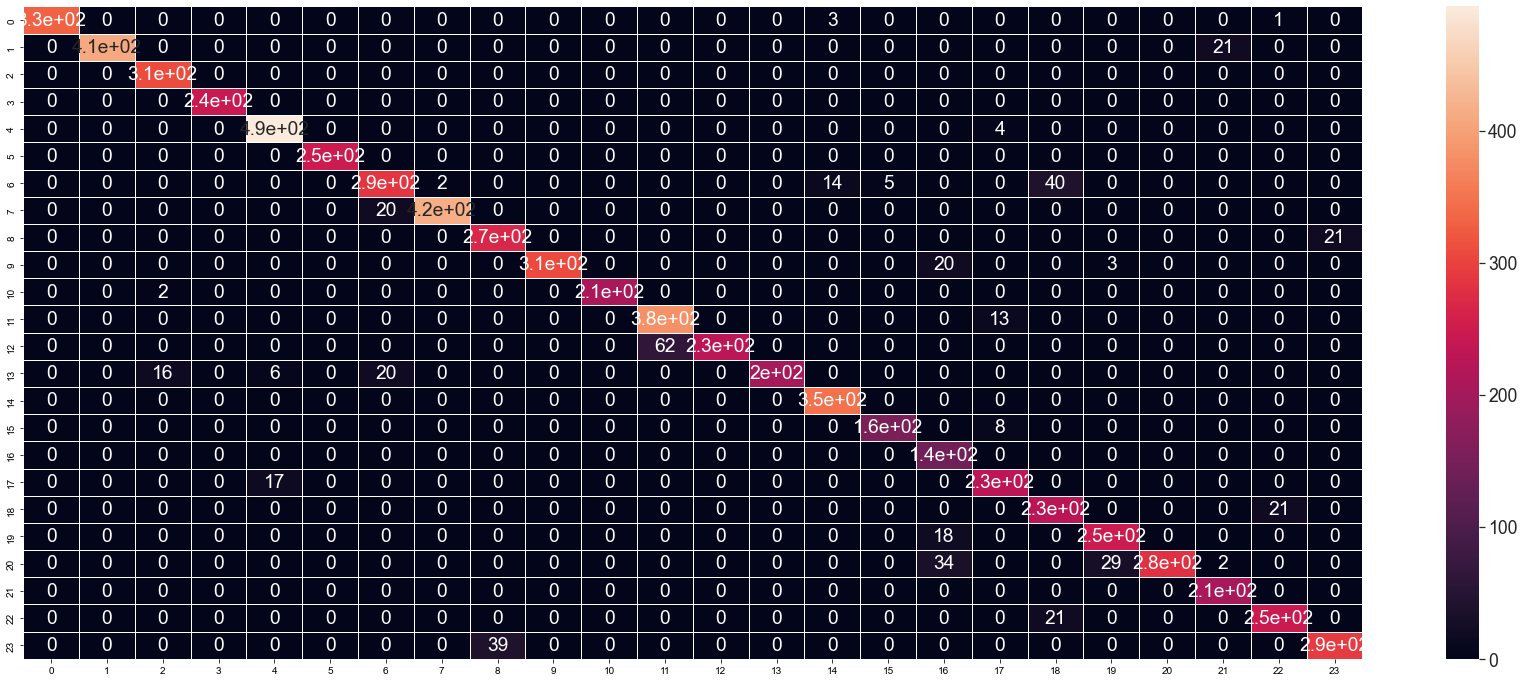

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction_classes)

fig, ax = plt.subplots(figsize=(30,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x15729ae6020>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'J'),
  Text(10, 0, 'K'),
  Text(11, 0, 'L'),
  Text(12, 0, 'M'),
  Text(13, 0, 'N'),
  Text(14, 0, 'O'),
  Text(15, 0, 'P'),
  Text(16, 0, 'Q'),
  Text(17, 0, 'R'),
  Text(18, 0, 'S'),
  Text(19, 0, 'T'),
  Text(20, 0, 'U'),
  Text(21, 0, 'V'),
  Text(22, 0, 'W'),
  Text(23, 0, 'X'),
  Text(24, 0, 'Y')])

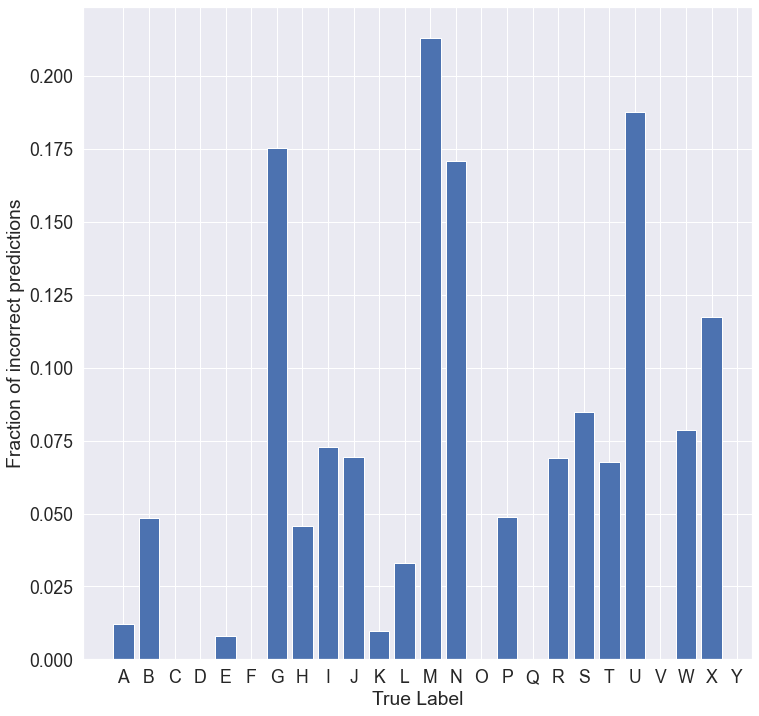

In [20]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(25), class_names)

## the External image Conversion to model suitable Format


In [32]:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray

In [53]:
def imageprepare(argv):
    im=Image.open(argv).convert('L')
    width=float(im.size[0])
    height=float (im.size[1])
    newImage = Image.new('L', (28,28), (255))
    
    if width >height:
        nheight = int(round((20.0 / width * height),0))
        if(nheight == 0):
            nheight=1
        img =im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop=int(round(((28-nheight)/2),0))
        newImage.paste(img, (4, wtop))
    else:
        nwidth = int(round((20.0 / width * height),0))
        if(nwidth == 0):
            nwidth=1
        img=im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft=int(round(((28 - nwidth)/2),0))
        newImage.paste(img, (wleft, 4))
    tv= list(newImage.getdata())
    tva = [(255-x)* 1.0 for x in tv]
    print(tva)
    return tva
file_path = 'D:\Dataset_CNN\Dataset\p_test.jpg'
x=imageprepare(file_path)
true_label = file_path.split("\\")[-1][0]
# x=imageprepare('D:\\Dataset_CNN\\p_test.jpg')
print(true_label)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

C:\Users\patel\AppData\Local\Temp\ipykernel_52076\2501972756.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img=im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)


In [54]:
x_array = np.array(x,dtype = 'int64')
x_array.shape


(784,)

In [55]:
x_array_reshaped = x_array.reshape((28,28))

In [56]:
x_array_reshaped.shape

(28, 28)

In [57]:
x_array_reshaped = x_array_reshaped[:]/255

In [58]:
x_array_reshaped

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Label for the image is: p


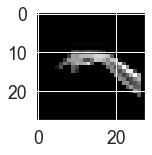

In [59]:
# i = random.randint(1,train.shape[0])
from PIL import Image as im
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(x_array_reshaped[:], cmap='gray') 
print("Label for the image is:",true_label)
plt.savefig('output.png', dpi=1000)




In [60]:
x_array_reshaped.reshape(1,28,28,1).shape

(1, 28, 28, 1)

In [61]:
# prediction = model.predict_classes(X_test)
prediction = model.predict(x_array_reshaped.reshape(1,28,28,1))
print(prediction)


1/1 [==============================] - 0s 15ms/step
[[1.2203780e-21 8.9430585e-31 3.0778086e-12 2.8037345e-12 2.3820336e-26
  1.1671101e-17 3.6531658e-10 1.9853419e-06 4.6850650e-20 2.2042374e-28
  8.5757614e-14 1.2772231e-15 1.3406925e-19 8.3765846e-16 1.5444755e-07
  9.9996400e-01 1.4185727e-12 7.0636591e-20 1.6222468e-16 1.0583777e-13
  3.6518757e-22 2.2841975e-28 2.0769395e-28 3.3841297e-05 3.9998323e-21]]


Predicted Label:  P
True Label:  p


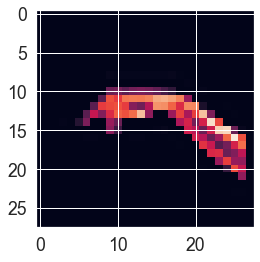

In [62]:
plt.imshow(x_array_reshaped) 
print("Predicted Label: ", class_names[np.argmax(prediction,axis=1)[0]])
print("True Label: ",true_label)